### Business Problem ;-

* Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

In [ ]:
# importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
yulu_data = pd.read_csv('yulu.csv')
yulu_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
## Checking/Confirming size of data
yulu_data.shape

(10886, 12)

In [ ]:
## Getting complete rows,columns and data-types of data
yulu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
# It give 5 point only statistical data summary
yulu_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# It give 5 point summary including object and statstical data
yulu_data.describe(include = object)

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [ ]:
# considering all
yulu_data.describe(include = 'all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [ ]:
# Checking null value
yulu_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

* There are no missing values in the data.

In [ ]:
# Skipping datetime
yulu_data.iloc[:, 1:].describe(include='all')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
yulu_data['datetime'] = pd.to_datetime(yulu_data['datetime'])

cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    yulu_data[col] = yulu_data[col].astype('object')


#### Checking value count

In [ ]:
yulu_data.value_counts().sum()

10886

In [ ]:
# Checking unique value
yulu_data['registered'].unique()

array([ 13,  32,  27,  10,   1,   0,   2,   7,   6,  24,  30,  55,  47,
        71,  70,  52,  26,  31,  25,  17,  16,   8,   4,  19,  46,  54,
        73,  64,  67,  58,  43,  29,  20,   9,   5,   3,  63, 153,  81,
        33,  41,  48,  53,  66, 146, 148, 102,  49,  11,  36,  92, 177,
        98,  37,  50,  79,  68, 202, 179, 110,  34,  87, 192, 109,  74,
        65,  85, 186, 166, 127,  82,  40,  18,  95, 216, 116,  42,  57,
        78,  59, 163, 158,  51,  76, 190, 125, 178,  39,  14,  15,  56,
        60,  90,  83,  69,  28,  35,  22,  12,  77,  44,  38,  75, 184,
       174, 154,  97, 214,  45,  72, 130,  94, 139, 135, 197, 137, 141,
       156, 117, 155, 134,  89,  80, 108,  61, 124, 132, 196, 107, 114,
       172, 165, 105, 119, 183, 175,  88,  62,  86, 170, 145, 217,  91,
       195, 152,  21, 126, 115, 223, 207, 123, 236, 128, 151, 100, 198,
       157, 168,  84,  99, 173, 121, 159,  93,  23, 212, 111, 193, 103,
       113, 122, 106,  96, 249, 218, 194, 213, 191, 142, 224, 24

In [ ]:
# minimum datetime and maximum datetime
yulu_data['datetime'].min(), yulu_data['datetime'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

In [ ]:
# number of unique values in each categorical columns
yulu_data[cat_cols].melt().groupby(['variable', 'value'])[['value']].count()

value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

### Univariate Analysis

In [ ]:
# understanding the distribution for numerical variables
data_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']


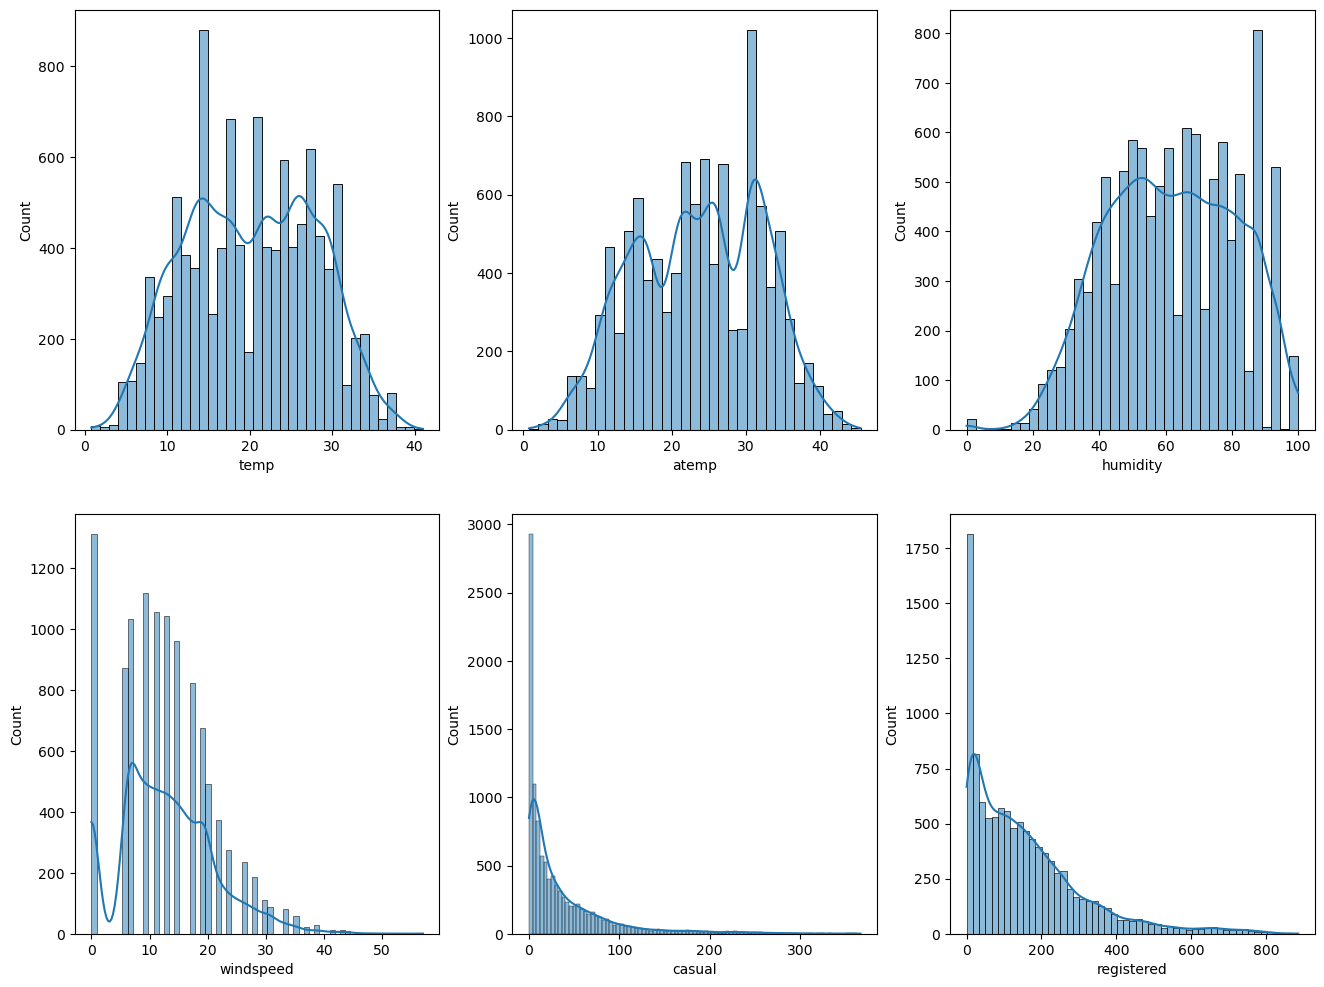

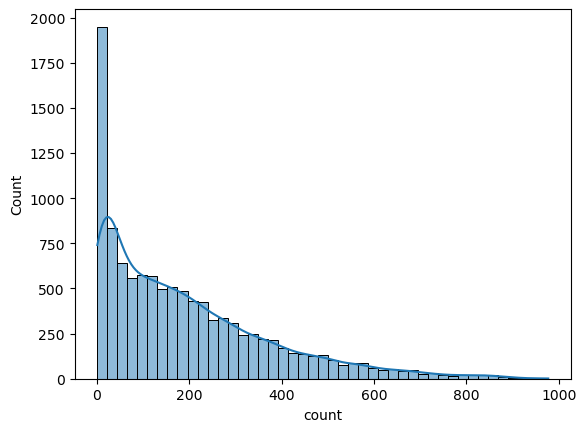

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(yulu_data[data_cols[index]], ax=axis[row, col], kde=True)
        index += 1

plt.show()
sns.histplot(yulu_data[data_cols[-1]], kde=True)
plt.show()

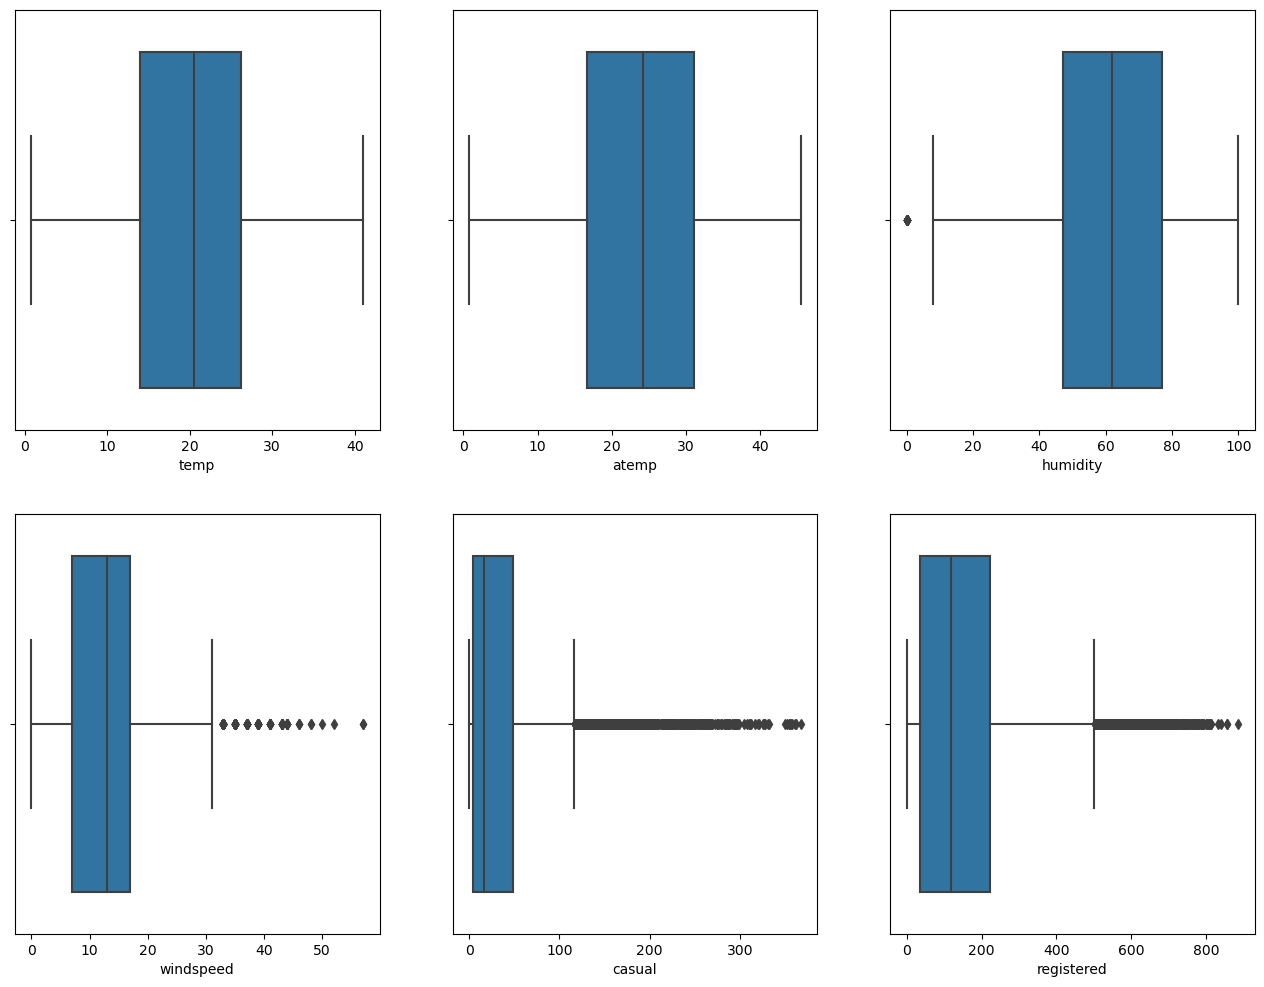

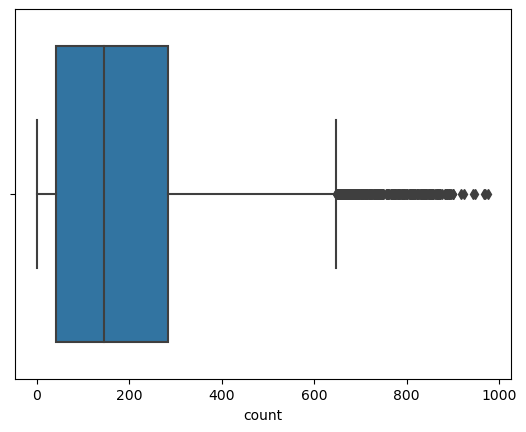

In [ ]:
# plotting box plots to detect outliers in the data
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=yulu_data[data_cols[index]], ax=axis[row, col])
        index += 1

plt.show()
sns.boxplot(x=yulu_data[data_cols[-1]])
plt.show()

* As per above plot humidity, casual, registered and count have outliers in the yulu_data.

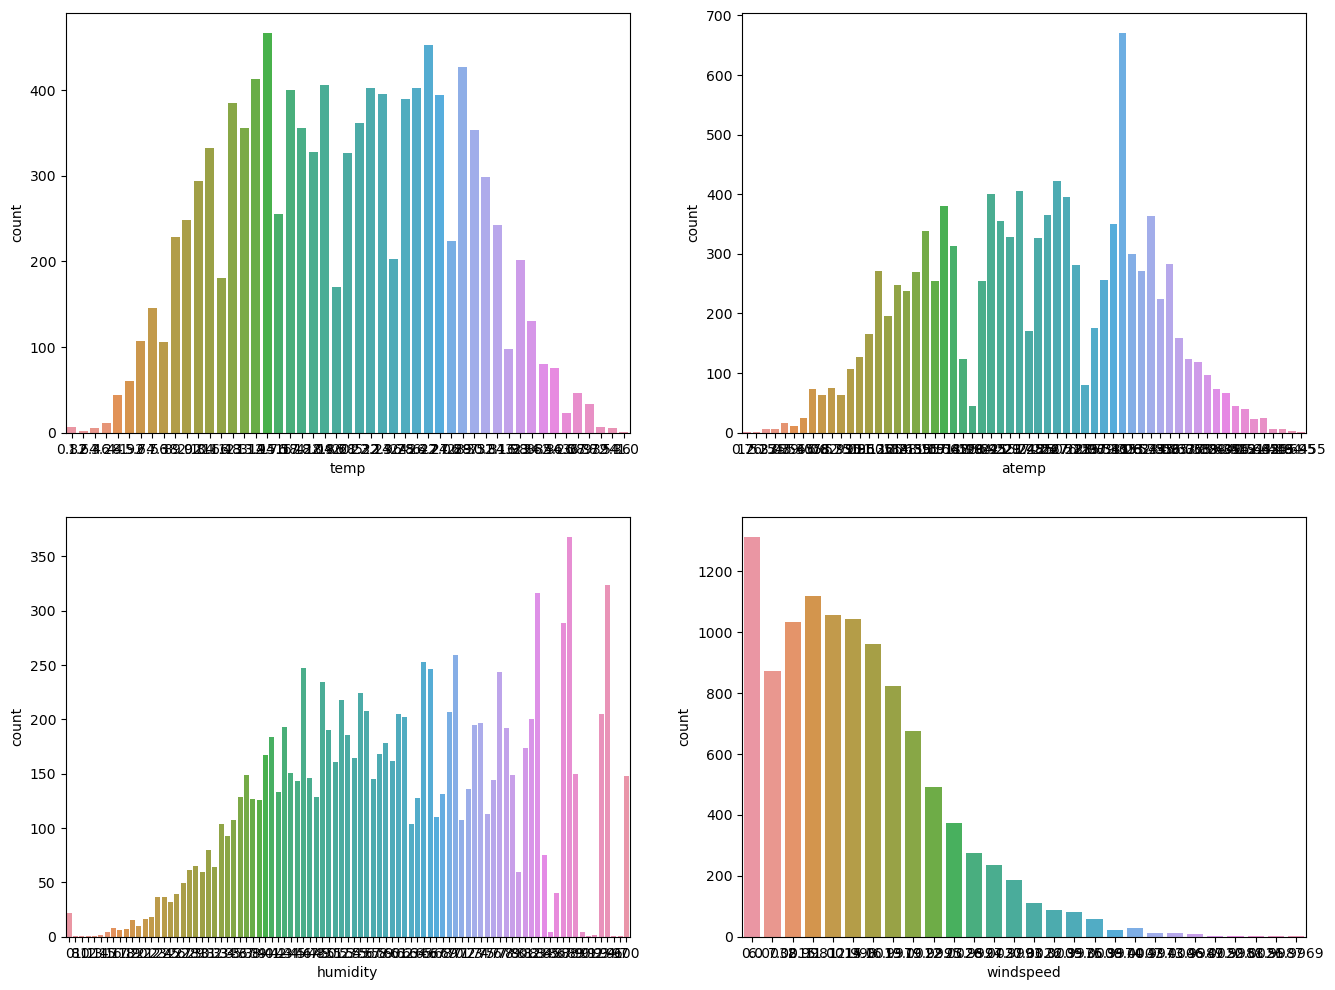

In [ ]:
# countplot of each categorical column
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=yulu_data, x=data_cols[index], ax=axis[row, col])
        index += 1

plt.show()

### Bi-variate Analysis

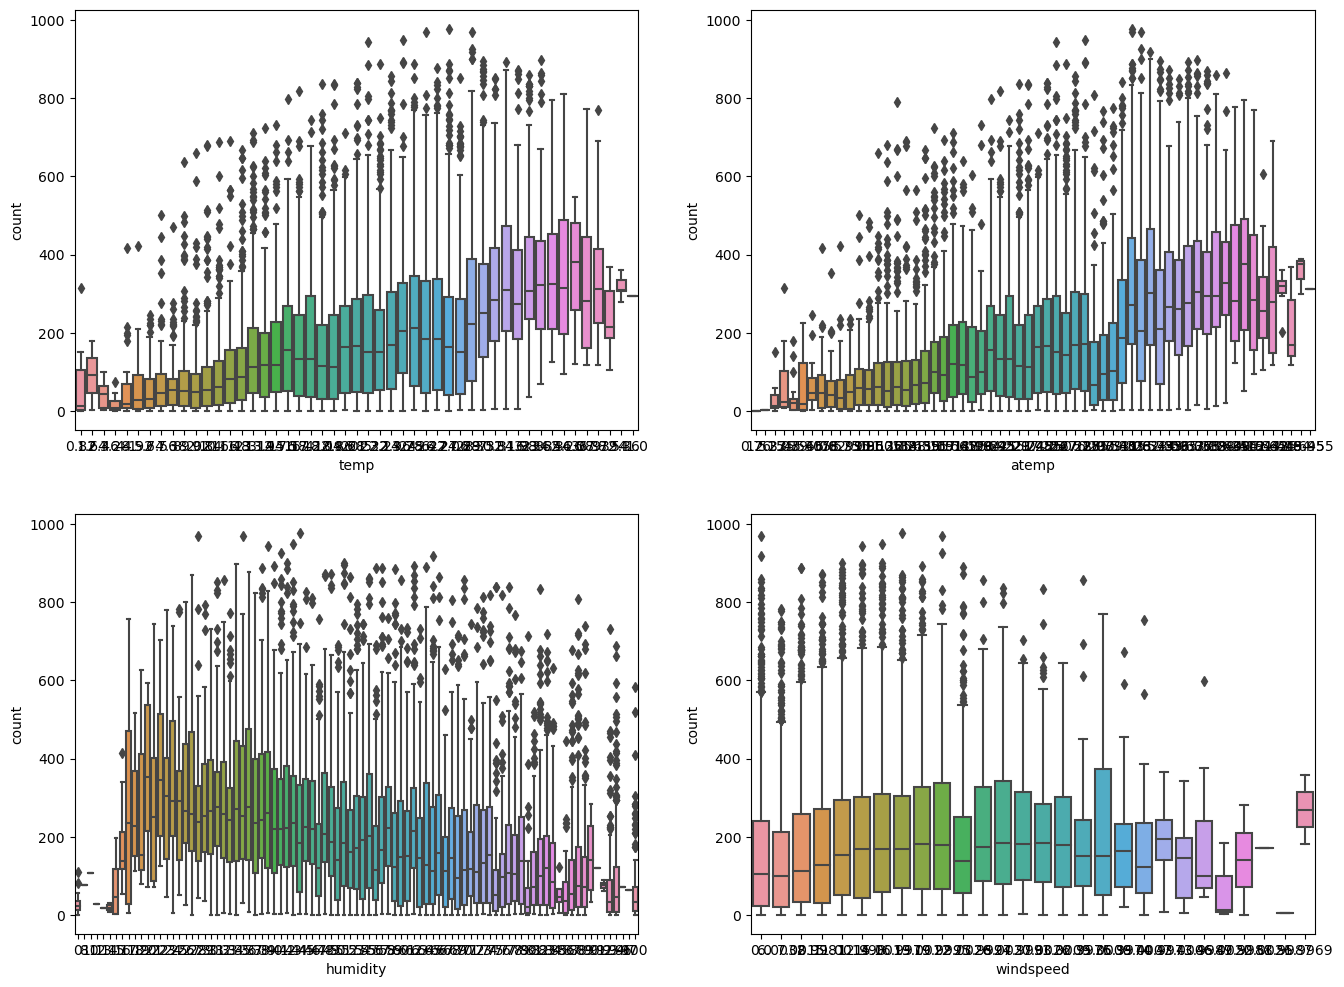

In [ ]:
# plotting categorical variables againt count using boxplots
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=yulu_data, x=data_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

* In summer and fall seasons more bikes are rented as compared to other seasons.
* Whenever its a holiday more bikes are rented.
* It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
* Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.

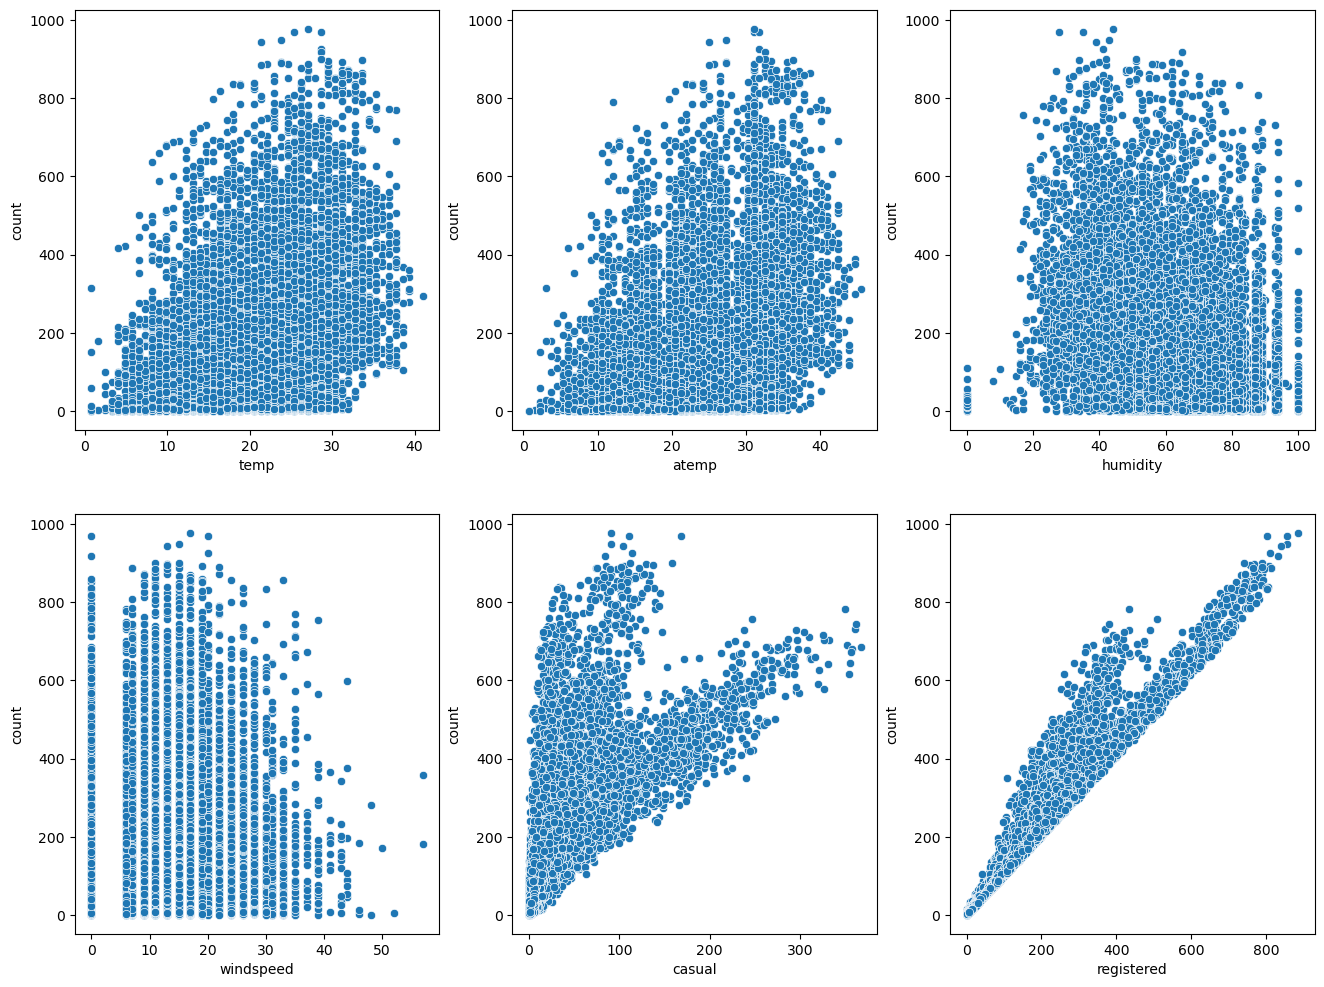

In [ ]:
# plotting numerical variables againt count using scatterplot
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=yulu_data, x=data_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

* Whenever the humidity is less than 20, number of bikes rented is very very low.
* Whenever the temperature is less than 10, number of bikes rented is less.
* Whenever the windspeed is greater than 35, number of bikes rented is less.

In [ ]:
# understanding the correlation between count and numerical variables
yulu_data.corr()['count']

C:\Users\yuvraj.pandey\AppData\Local\Temp\ipykernel_5840\3076052470.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  yulu_data.corr()['count']


temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

C:\Users\yuvraj.pandey\AppData\Local\Temp\ipykernel_5840\2590199631.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(yulu_data.corr(), annot=True)


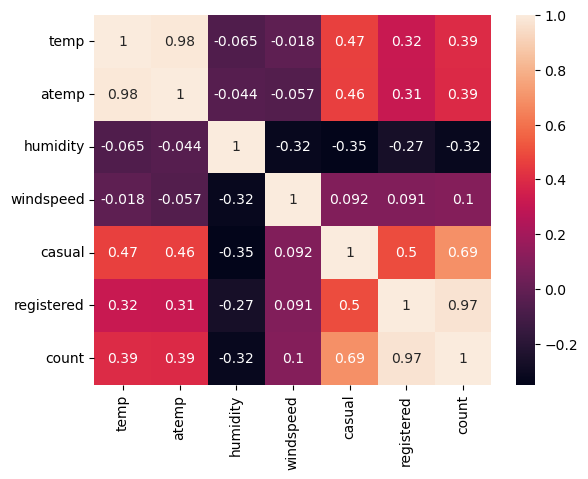

In [ ]:
sns.heatmap(yulu_data.corr(), annot=True)
plt.show()

### Hypothesis Testing - 1

Null Hypothesis (H0): Weather is independent of the season

Alternate Hypothesis (H1): Weather is not independent of the season

Significance level (alpha): 0.05

* We will use chi-square test to test hypyothesis defined above.

In [ ]:
new_table = pd.crosstab(yulu_data['season'], yulu_data['weather'])
print("Observed values:")
new_table

Observed values:


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [ ]:
from scipy import stats

In [ ]:
val = stats.chi2_contingency(new_table)
expected_values = val[3]
expected_values

array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]])

In [ ]:
nrows, ncols = 4, 4
dof = (nrows-1)*(ncols-1)
print("degrees of freedom: ", dof)
alpha = 0.05

degrees of freedom:  9


In [ ]:
chi_sqr = sum([(o-e)**2/e for o, e in zip(new_table.values, expected_values)])
chi_sqr_statistic = chi_sqr[0] + chi_sqr[1]
print("chi-square test statistic: ", chi_sqr_statistic)

chi-square test statistic:  44.09441248632364


In [ ]:
critical_val = stats.chi2.ppf(q=1-alpha, df=dof)
print(f"critical value: {critical_val}")

critical value: 16.918977604620448


In [ ]:
p_val = 1-stats.chi2.cdf(x=chi_sqr_statistic, df=dof)
print(f"p-value: {p_val}")

p-value: 1.3560001579371317e-06


In [ ]:
if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that\
    Weather is dependent on the season.")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis")


Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that    Weather is dependent on the season.


### Hypothesis Testing - 2

Null Hypothesis: Working day has no effect on the number of cycles being rented.

Alternate Hypothesis: Working day has effect on the number of cycles being rented.

Significance level (alpha): 0.05

We will use the 2-Sample T-Test to test the hypothess defined above

In [ ]:
data_group1 = yulu_data[yulu_data['workingday']==0]['count'].values
data_group2 = yulu_data[yulu_data['workingday']==1]['count'].values

np.var(data_group1), np.var(data_group2)

(30171.346098942427, 34040.69710674686)

Before conducting the two-sample T-Test we need to find if the given data groups have the same variance. If the ratio of the larger data groups to the small data group is less than 4:1 then we can consider that the given data groups have equal variance.

* Here, the ratio is 34040.70 / 30171.35 which is less than 4:1

In [ ]:
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)

Since pvalue is greater than 0.05 so we can not reject the Null hypothesis. We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.

### Hypothesis Testing - 3

Null Hypothesis: Number of cycles rented is similar in different weather and season.

Alternate Hypothesis: Number of cycles rented is not similar in different weather and season.

Significance level (alpha): 0.05

* Here, we will use the ANOVA to test the hypothess defined above

In [ ]:
# defining the data groups for the ANOVA

gp1 = yulu_data[yulu_data['weather']==1]['count'].values
gp2 = yulu_data[yulu_data['weather']==2]['count'].values
gp3 = yulu_data[yulu_data['weather']==3]['count'].values
gp4 = yulu_data[yulu_data['weather']==4]['count'].values

gp5 = yulu_data[yulu_data['season']==1]['count'].values
gp6 = yulu_data[yulu_data['season']==2]['count'].values
gp7 = yulu_data[yulu_data['season']==3]['count'].values
gp8 = yulu_data[yulu_data['season']==4]['count'].values

# conduct the one-way anova
stats.f_oneway(gp1, gp2, gp3, gp4, gp5, gp6, gp7, gp8)

F_onewayResult(statistic=127.96661249562491, pvalue=2.8074771742434642e-185)

* Since p-value is less than 0.05, we reject the null hypothesis.
* This implies that Number of cycles rented is not similar in different weather and season conditions

#### Insights

* In summer and fall seasons more bikes are rented as compared to other seasons.
* Whenever its a holiday more bikes are rented.
* It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
* Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.
* Whenever the humidity is less than 20, number of bikes rented is very very low.
* Whenever the temperature is less than 10, number of bikes rented is less.
* Whenever the windspeed is greater than 35, number of bikes rented is less.

#### Recommendations

* In summer and fall seasons the company should have more bikes in stock to be rented.
Because the demand in these seasons is higher as compared to other seasons.
* With a significance level of 0.05, workingday has no effect on the number of bikes being rented.
* In very low humid days, company should have less bikes in the stock to be rented.
* Whenever temprature is less than 10 or in very cold days, company should have less bikes.
* Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.